In [1]:
library("rwwa")

Loading required package: extRemes

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot


Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:distillery’:

    is.formula


Loading required package: copula

Loading required package: MASS



In [2]:
gmst <- read.csv("gmst_giss.csv", col.names = c("year", "gmst"))
nino <- read.csv("nino34rel-djf_iersst.csv", col.names = c("year", "nino"))
ts <- read.csv("rx5day-OND_chirps.csv", col.names = c("year", "rx5day"))

In [3]:
# combine into a single dataframe
# R will automatically match any columns with the same name (in this case, 'year') and discard any that don't match
df <- merge(merge(gmst, nino), ts)

In [4]:
mdl_gmst <- fit_ns(dist = "gev", type = "fixeddisp", data = df, varnm = "rx5day", covnm = c("gmst"), lower = F, ev_year = 2023)
mdl_gmstnino <- fit_ns(dist = "gev", type = "fixeddisp", data = df, varnm = "rx5day", covnm = c("gmst", "nino"), lower = F, ev_year = 2023)

In [5]:
# compare model fit
aic(mdl_gmst)
aic(mdl_gmstnino)

[1] 364.8782

[1] 355.6569

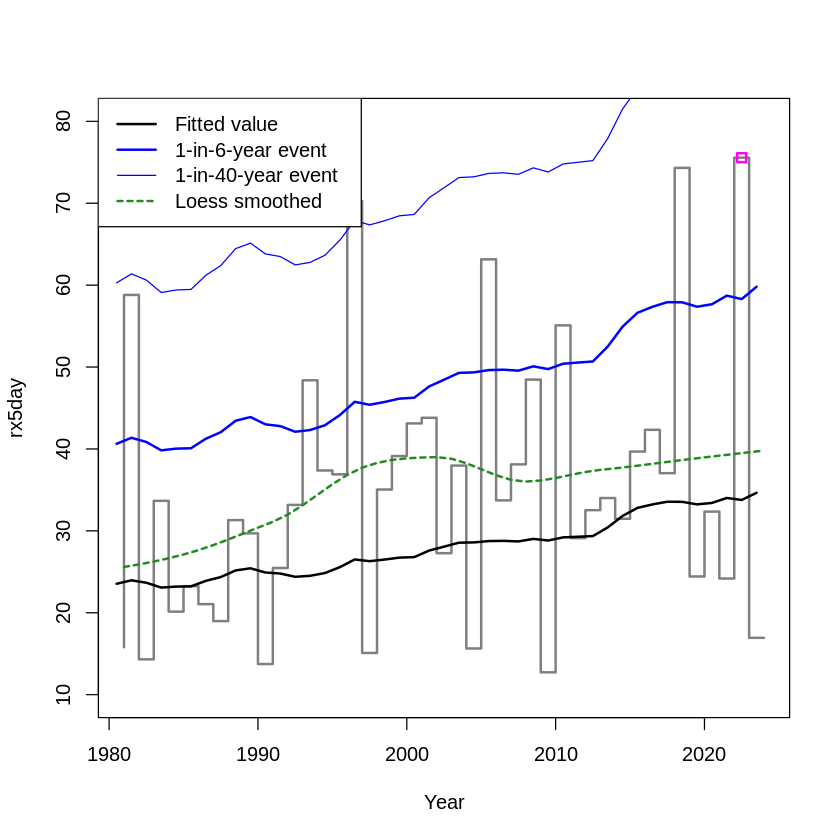

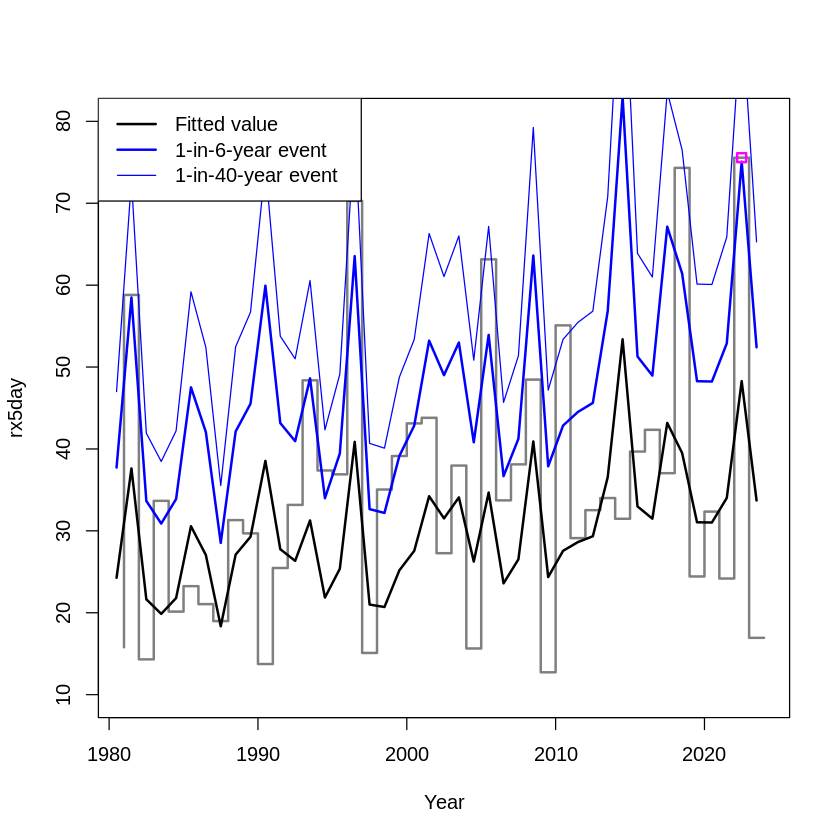

In [6]:
plot_trend(mdl_gmst, add_loess = T)
plot_trend(mdl_gmstnino)

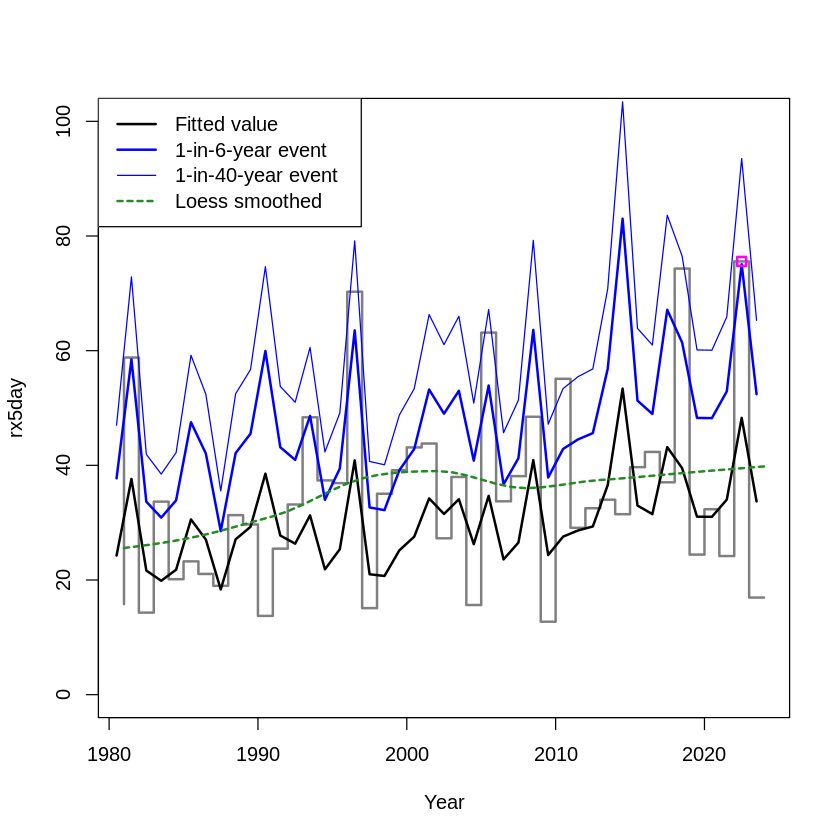

In [7]:
ylim <- c(0,100)
plot_trend(mdl_gmstnino, ylim = ylim, add_loess = T)

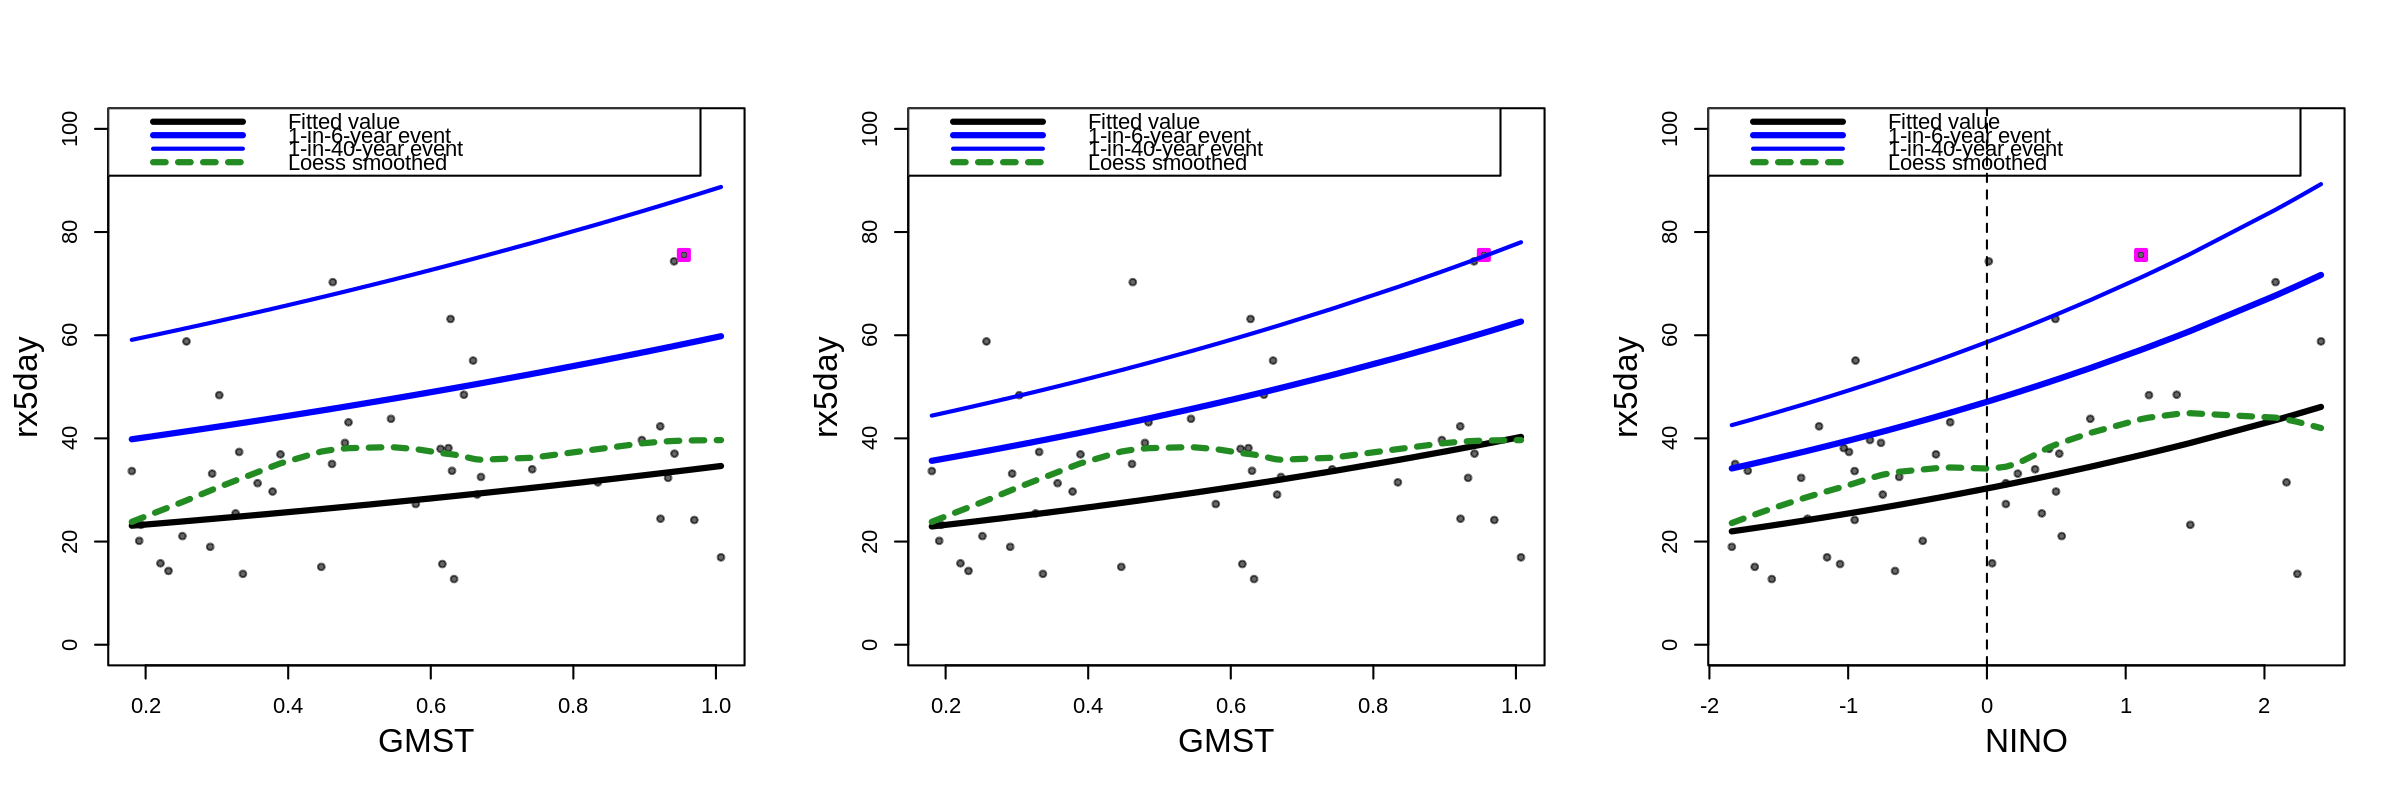

In [8]:
prep_window(c(1,3))
plot_covtrend(mdl_gmst, "gmst", ylim = ylim, add_loess = T)
plot_covtrend(mdl_gmstnino, "gmst", ylim = ylim, add_loess = T)
plot_covtrend(mdl_gmstnino, "nino", ylim = ylim, add_loess = T)
abline(v = 0, lty = 2) # add a dashed line

In [9]:
# define that factual & counterfactual climates
cov_f <- df[df$year == 2023,c("gmst","nino"),drop = F]

cov_cf <- data.frame(rbind("pi" = c("gmst" = cov_f$gmst - 1.3, "nino" = cov_f$nino),
                           "neut" = c("gmst" = cov_f$gmst, "nino" = 0),
                           "pineut" = c("gmst" = cov_f$gmst - 1.3, "nino" = 0)))

In [10]:
# quick look at best estimates
data.frame(mdl_ests(mdl_gmstnino, cov_f = cov_f, cov_cf = cov_cf))

,mdl_ests.mdl_gmstnino..cov_f...cov_f..cov_cf...cov_cf.
,<dbl>
mu0,20.7406955
sigma0,8.5396006
alpha_gmst,14.1415687
alpha_nino,3.6182533
shape,-0.2858292
disp,0.4117316
event_magnitude,75.5622482
return_period,6.2252625
PR_pi,Inf


In [ ]:
# bootstrap results
boot_res <- boot_ci(mdl_gmstnino, cov_f = cov_f, cov_cf = cov_cf)

In [44]:
ds_nm = "chirps"
write.csv(boot_res, paste0("res-obs_",ds_nm,".csv"))

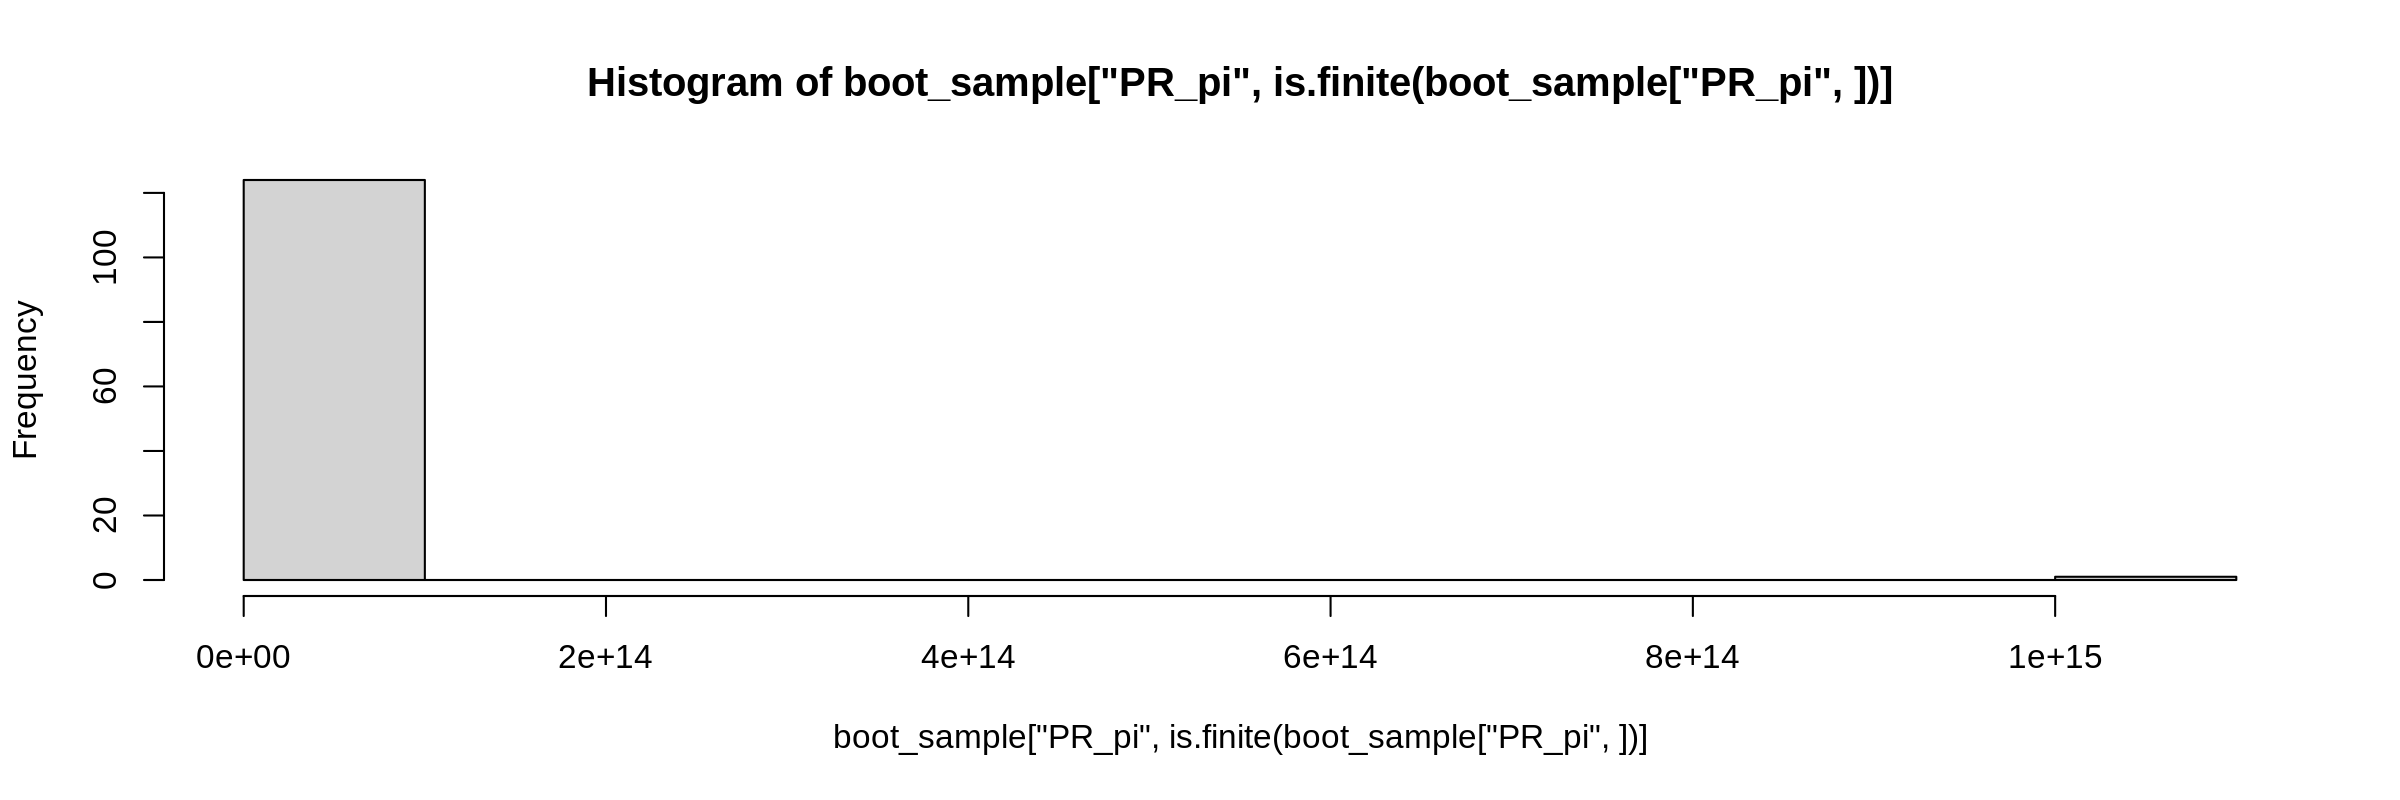

In [56]:
hist(boot_sample["PR_pi", is.finite(boot_sample["PR_pi", ])])

In [11]:
boot_sample = boot_ci(mdl_gmstnino, cov_f = cov_f, cov_cf = cov_cf, return_sample = T)

In [ ]:
hist(boot_sample["alpha_gmst",], breaks = "fd")
abline(v = quantile(boot_sample["alpha_gmst",], c(0.025, 0.975), na.rm = T), col = "red")
abline(v = mdl_ests(mdl_gmstnino, cov_f = cov_f, cov_cf = cov_cf)["alpha_gmst"], col = "magenta", lwd = 2

In [52]:
sum(is.na(boot_sample["alpha_gmst",]))

[1] 41

In [57]:
# load covariates (these can be outside the loop since they're the same for all obs)
gmst <- read.csv("gmst_giss.csv", col.names = c("year", "gmst"))
nino <- read.csv("nino34rel-djf_iersst.csv", col.names = c("year", "nino"))

for(ds_nm in c("chirps")) {

    # load the data
    ts <- read.csv(paste0("rx5day-OND_",ds_nm,".csv"), col.names = c("year", "rx5day"))
    df <- merge(merge(gmst, nino), ts)
    
    # do whatever analysis you want to do

    # save the results - eg.
    write.csv(boot_res, paste0("res-obs_",ds_nm,".csv"))
}

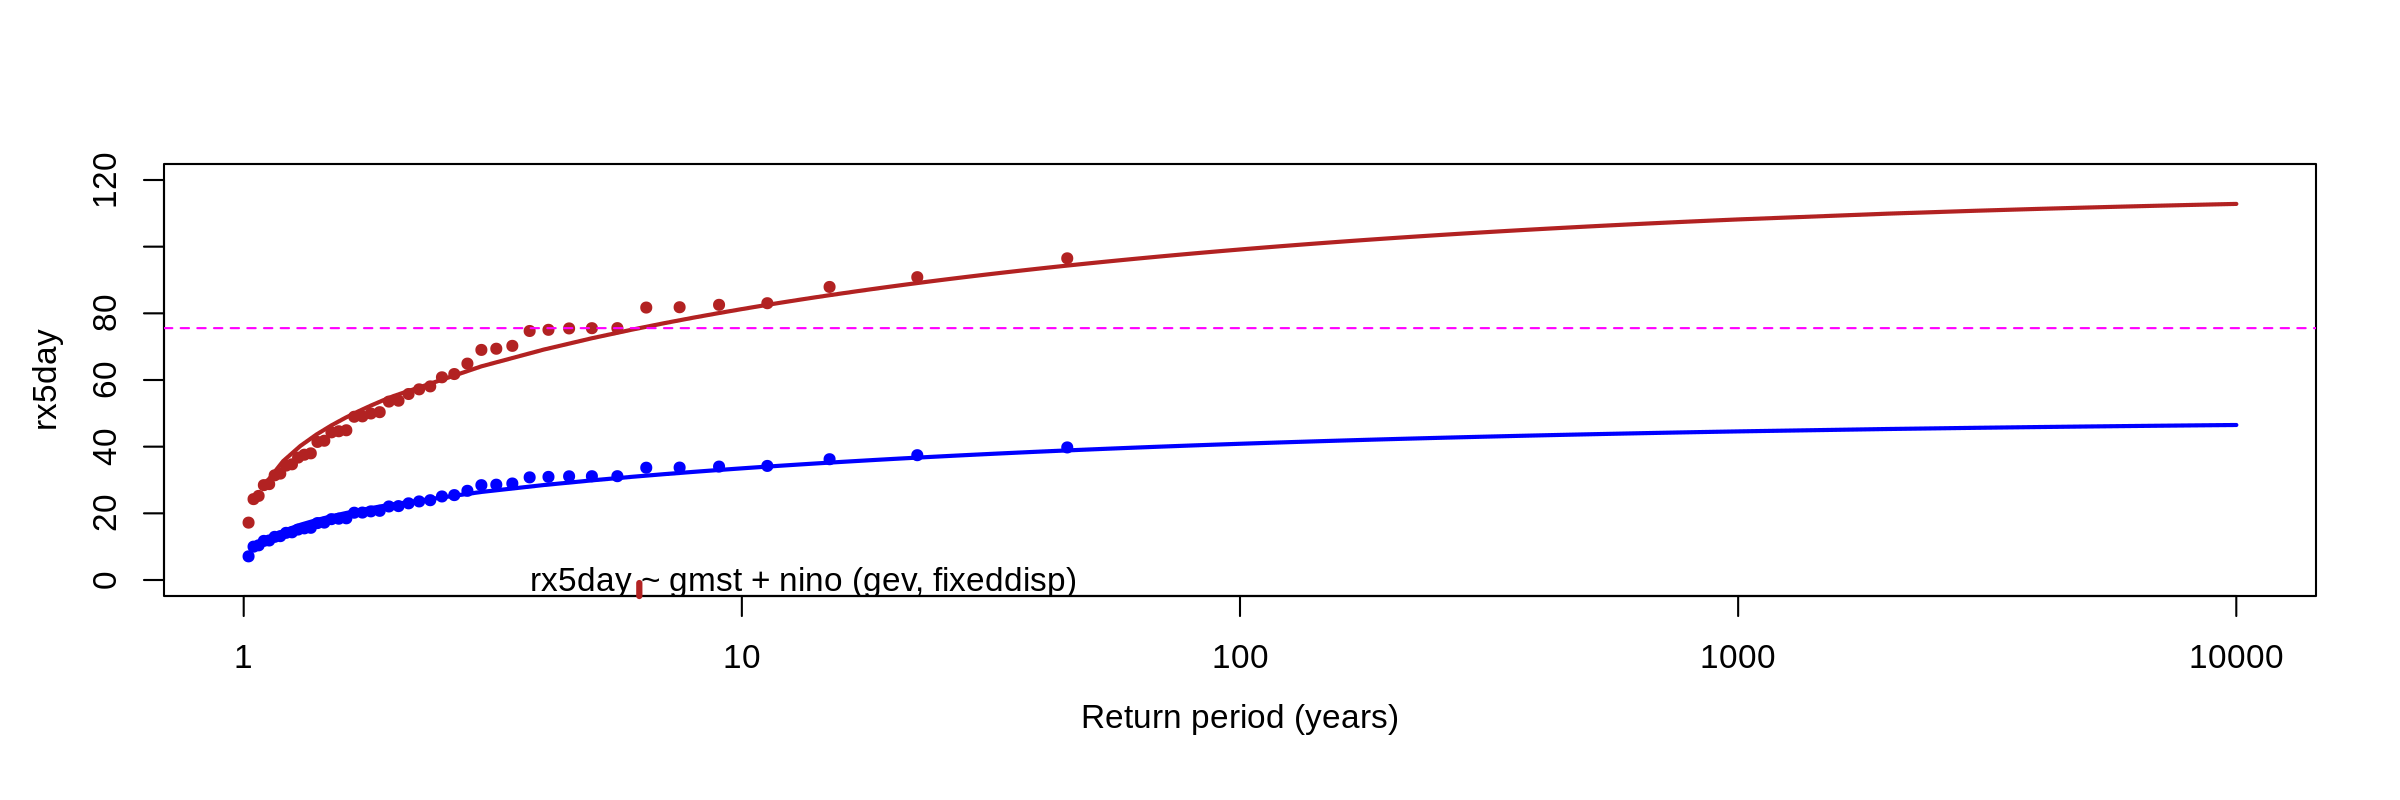

In [47]:
plot_returnlevels(mdl_gmstnino, cov_f = cov_f, cov_cf = cov_cf["pi",,drop = F], legend_pos = 2, nsamp = 5)

In [48]:
datasets <- c("era5")

obs_res <- data.frame(t(sapply(datasets, function(ds) {
    res <- read.csv(paste0("res-obs_",ds,".csv"), row.names = "X")
    unlist(lapply(rownames(res), function(cnm) setNames(res[cnm,], paste(gsub("_", "-", cnm), c("est", "lower", "upper"), sep = "_"))))
})))

# select the critical columns & save as a single .csv
write.csv(obs_res, "res-obs.csv")

In [62]:

boot_ci

boot_ci {rwwa},R Documentation
mdl,"List of attributes & parameters defining a nonstationary model, as returned by 'fit_ns'"
cov_f,Data.frame with one row containing named covariates defining the factual climate
cov_cf,Data.frame with one or more rows containing named covariates defining the counterfactual climate
ev,"(Optional) scalar: magnitude of the event of interest. If not provided, event value is picked up from the fitted model"
rp,(Optional) scalar: fixed return period of interest
seed,Scalar: seed to be used to initialise random sample for bootstrapped confidence intervals (if using)
nsamp,Scalar: number of bootstrap samples to be used to estimate confidence intervals for location parameter. Set to NA if no confidence intervals are required. Default is 500.
ci,Scalar from 0 to 1 defining width of confidence interval. Default is 0.95
return_sample,Boolean: return confidence interval (F) or full bootstrap sample (T)? Default is to return the interval (F).
